# Exploratory Data Analysis of the Iris Dataset

This notebook performs an exploratory data analysis (EDA) of the Iris dataset to understand the underlying patterns and relationships in the data. The Iris dataset is a classic dataset in machine learning and statistics, consisting of measurements of iris flowers from three different species.

**Objectives:**

- Examine the distribution of each feature.
- Visualize relationships between features.
- Identify any patterns that can inform our modeling approach.


In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting styles
%matplotlib inline
sns.set(style="whitegrid")

# Load environment variables
from dotenv import load_dotenv
load_dotenv()
project_root = os.getenv("PROJECT_ROOT")
if not project_root:
    raise ValueError("PROJECT_ROOT is not set. Please run set_project_root.py.")

# Define data paths
raw_data_path = os.path.join(project_root, 'data', 'raw', 'iris.csv')

# Load the dataset
df = pd.read_csv(raw_data_path)


In [2]:
# Display the first few rows
df.head()


,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Get dataset shape
print(f"The dataset contains {df.shape[0]} samples and {df.shape[1]} features.")


The dataset contains 150 samples and 5 features.


In [4]:
# Check for missing values
df.isnull().sum()


sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [5]:
# Data types
df.dtypes


sepal_len    float64
sepal_wid    float64
petal_len    float64
petal_wid    float64
class          int64
dtype: object

In [6]:
# Statistical summary
df.describe()


,sepal_len,sepal_wid,petal_len,petal_wid,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


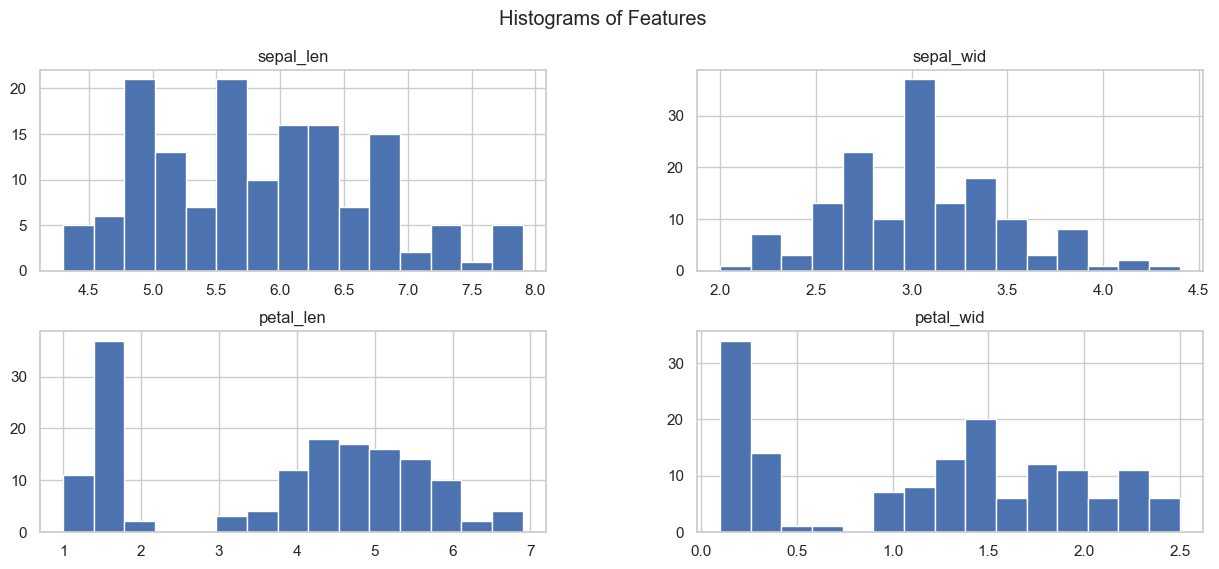

In [7]:
# Histograms of features
features = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
df[features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.suptitle('Histograms of Features')
plt.show()


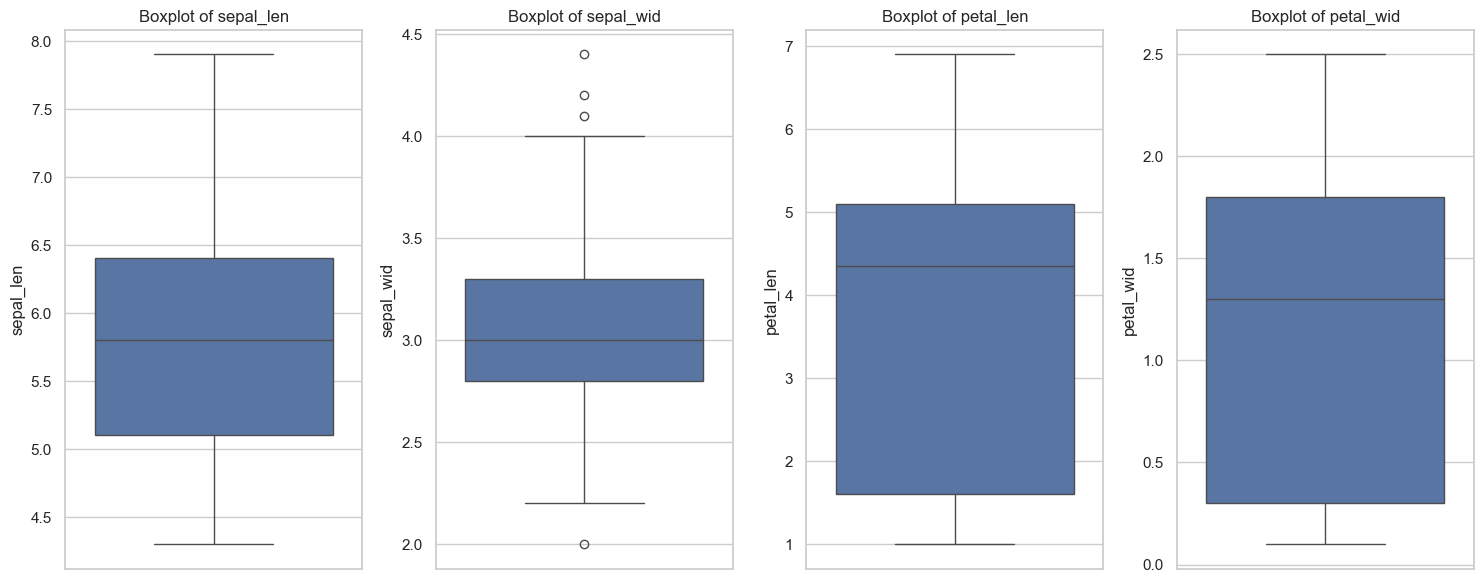

In [8]:
# Boxplots of features
plt.figure(figsize=(15, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


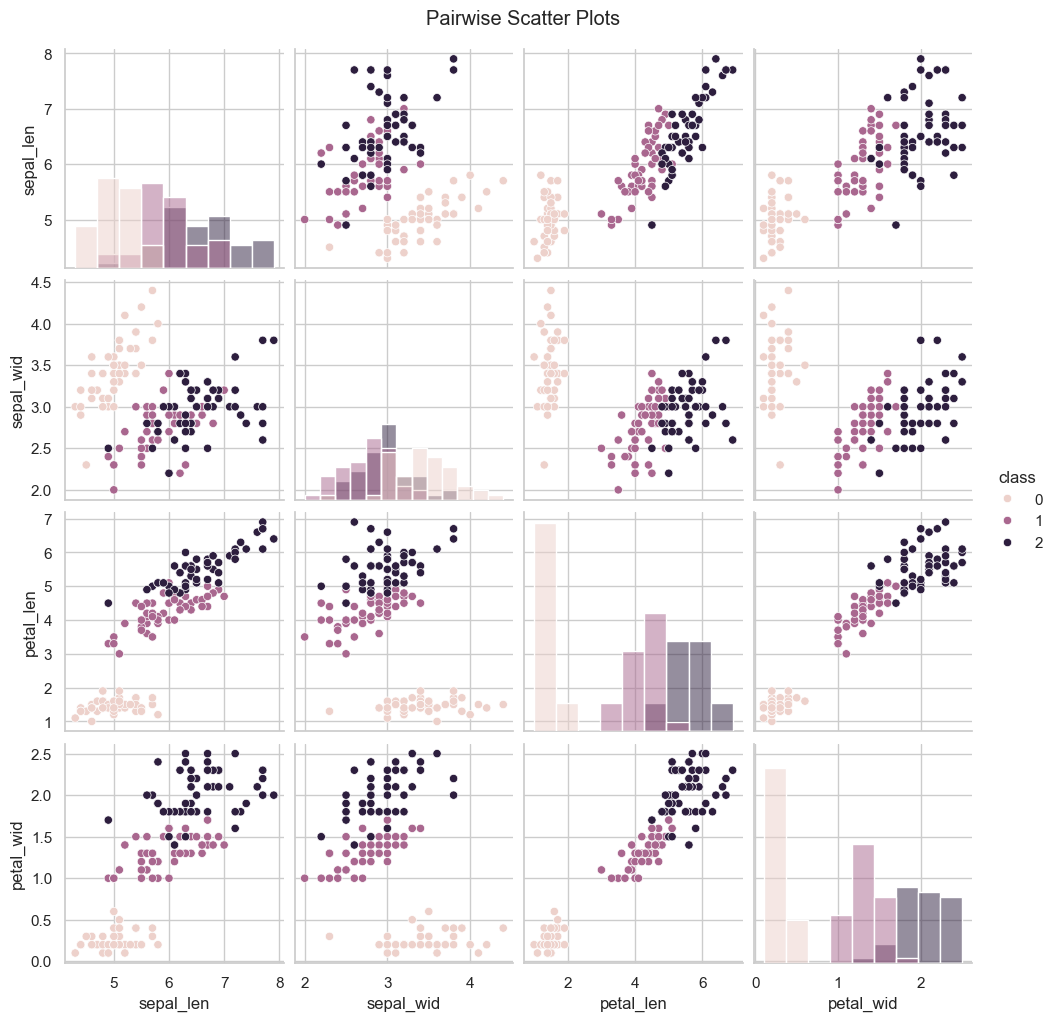

In [9]:
# Pairplot
sns.pairplot(df, hue='class', diag_kind='hist')
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()


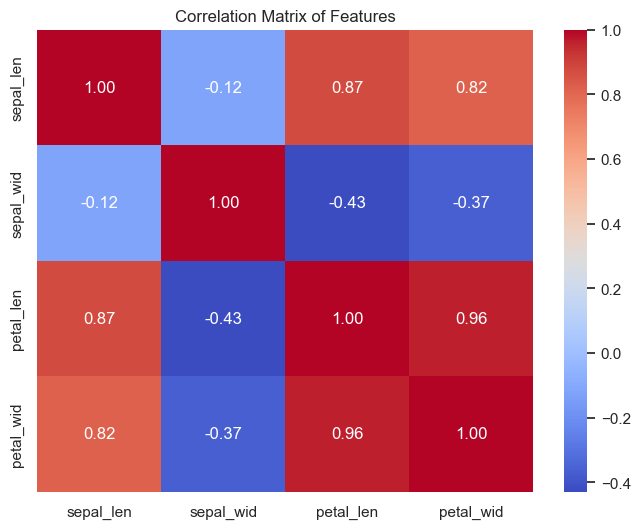

In [10]:
# Compute correlation matrix
corr_matrix = df[features].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


## Insights and Observations

- **Feature Distributions:**
  - *Sepal Length* and *Petal Length* appear to be normally distributed.
  - *Sepal Width* shows a slight left skew.
  - *Petal Width* is right-skewed.

- **Class Separation:**
  - The pairwise scatter plots show that *Iris Setosa* (class 0) is well-separated from the other two species in terms of petal measurements.
  - There is some overlap between *Iris Versicolor* (class 1) and *Iris Virginica* (class 2), particularly in sepal measurements.

- **Feature Relationships:**
  - Strong positive correlation between *Petal Length* and *Petal Width*.
  - Weak correlation between sepal measurements and petal measurements.

- **Implications for Modeling:**
  - Features with high correlation may not provide additional information and could be considered for dimensionality reduction.
  - The clear separation of *Iris Setosa* suggests that the model should easily classify this species.
  - Additional attention may be needed to distinguish between *Iris Versicolor* and *Iris Virginica*.
